# Task 2: Classification (Red vs. White)

• Distinguish between red and white wines.

• Use two different classification algorithms (they may, or may not, be the same as in Task 1).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Load the red and white wine datasets
df_red = pd.read_csv('/home/hjoaquim/Documents/applied-ai/wine-analysis/data/red_wine.csv')
df_white = pd.read_csv('/home/hjoaquim/Documents/applied-ai/wine-analysis/data/white_wine.csv')

# Remove rows with missing values from both datasets
df_red.dropna(inplace=True)
df_white.dropna(inplace=True)

# Create column color with value 1 for red wine and 0 for white wine
df_red['color'] = 1
df_white['color'] = 0

# Merge the datasets
wine_data = pd.concat([df_red, df_white], ignore_index=True)
display(wine_data.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.8,1.01,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5,6,1
1,7.8,0.82,0.29,4.3,0.083,21.0,64.0,0.99642,3.16,0.53,9.4,5,1
2,7.1,0.66,0.00,3.9,0.086,17.0,45.0,0.99760,3.46,0.54,9.5,5,1
3,6.1,0.56,0.00,2.2,0.079,6.0,9.0,0.99480,3.59,0.54,11.5,6,1
4,7.8,0.55,0.35,2.2,0.074,21.0,66.0,0.99740,3.25,0.56,9.2,5,1


In [3]:
# TODO: balance the dataset by randomly removing some of the majority class samples.

In [4]:
# Since we want to predict 'color', separate the features and the target
X = wine_data.drop('color', axis=1)
y = wine_data['color']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.74
              precision    recall  f1-score   support

withe_wine_0       0.74      1.00      0.85       864
  red_wine_1       0.00      0.00      0.00       305

    accuracy                           0.74      1169
   macro avg       0.37      0.50      0.42      1169
weighted avg       0.55      0.74      0.63      1169



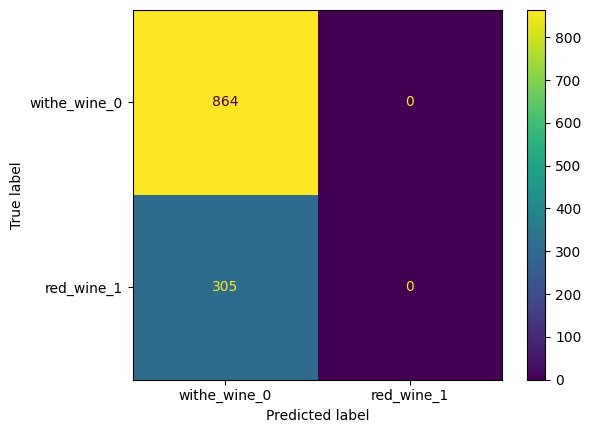

In [5]:
# Initialize a baseline algorithm using DummyClassifier
# The strategy "most_frequent" will always predict the most frequent class label in the training dataset
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)

# Predict with DummyClassifier
y_pred_dummy = dummy_clf.predict(X_test)

# Evaluate the baseline classifier
accuracy_score_dummy = accuracy_score(y_test, y_pred_dummy)
print(f"Accuracy: {accuracy_score_dummy:.2f}")
print(classification_report(y_test, y_pred_dummy, target_names=["withe_wine_0", "red_wine_1"], zero_division=0.0))
ConfusionMatrixDisplay.from_estimator(dummy_clf, X_test, y_test, display_labels=["withe_wine_0", "red_wine_1"])
plt.show()

Logistic Regression Accuracy: 98.12%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       864
           1       0.98      0.94      0.96       305

    accuracy                           0.98      1169
   macro avg       0.98      0.97      0.98      1169
weighted avg       0.98      0.98      0.98      1169


Gradient Boosting Accuracy: 99.06%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       864
           1       0.99      0.97      0.98       305

    accuracy                           0.99      1169
   macro avg       0.99      0.98      0.99      1169
weighted avg       0.99      0.99      0.99      1169



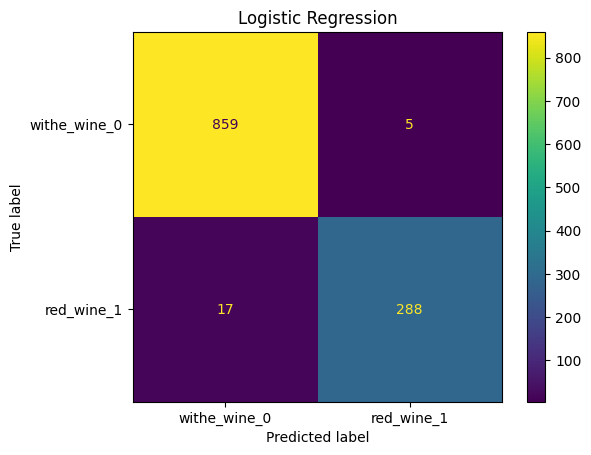

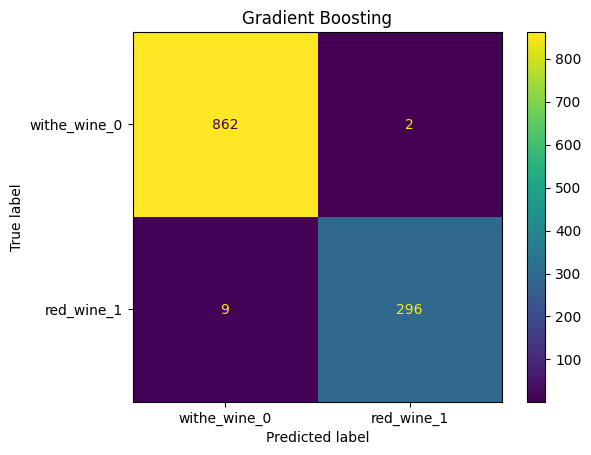

In [6]:
# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train models
log_reg.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Predict
y_pred_log_reg = log_reg.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)

# Evaluate
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_report = classification_report(y_test, y_pred_log_reg)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_report = classification_report(y_test, y_pred_gb)

print("Logistic Regression Accuracy: {:.2f}%".format(log_reg_accuracy * 100))
print(log_reg_report)
print("\nGradient Boosting Accuracy: {:.2f}%".format(gb_accuracy * 100))
print(gb_report)

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, display_labels=["withe_wine_0", "red_wine_1"])
plt.title('Logistic Regression')
plt.show()
ConfusionMatrixDisplay.from_estimator(gb_clf, X_test, y_test, display_labels=["withe_wine_0", "red_wine_1"])
plt.title('Gradient Boosting')
plt.show()

# Saving models with `joblib`

In [7]:
import joblib
joblib.dump(log_reg, "models/task_2_log_reg.pkl")
joblib.dump(gb_clf, "models/task_2_gb_clf.pkl")

['models/task_2_gb_clf.pkl']